<a href="https://colab.research.google.com/github/simardeepsinghsandhu/MNIST-on-pytorch/blob/main/MNIST_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
!pip install torchvision

In [ ]:
import torchvision

In [ ]:
from torchvision import transforms, datasets

In [ ]:
train = datasets.MNIST('', train=True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x,y = data[0][0], data[1][0]

In [ ]:
x.shape

torch.Size([1, 28, 28])

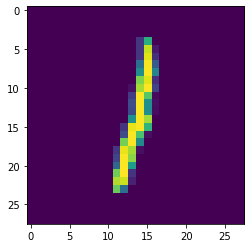

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x.view(28,28)) #reshape because 1,28,28 isnt a size for an image to be displayed in imshow()

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
for i in counter_dict:
  print(f'{i}: {counter_dict[i]/total*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)   # Input, output size
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim=1)   # Distributing across the output layer tensors

    return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1,28*28) #flatten(-1 specifies it will be of unknown shape)
output = net(X)
output

tensor([[-2.4034, -2.2988, -2.1812, -2.2271, -2.3717, -2.2477, -2.2666, -2.5229,
         -2.2682, -2.2817]], grad_fn=<LogSoftmaxBackward>)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 1e-3, )
EPOCHS = 10
for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of feature sets and labels
    X,y = data
    net.zero_grad() # do this everytime
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)

    # Backprop
    loss.backward() # backprop
    optimizer.step()    # optimize weights and biases
  print(loss)

tensor(0.3417, grad_fn=<NllLossBackward>)
tensor(0.7083, grad_fn=<NllLossBackward>)
tensor(0.0809, grad_fn=<NllLossBackward>)
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor(0.0460, grad_fn=<NllLossBackward>)
tensor(0.0059, grad_fn=<NllLossBackward>)
tensor(0.1264, grad_fn=<NllLossBackward>)
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor(0.5712, grad_fn=<NllLossBackward>)
tensor(0.0101, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X,y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total+=1
print('Accuracy: ', correct/total)

Accuracy:  0.9910333333333333


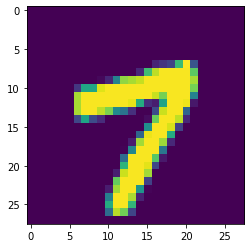

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28, 28))
plt.show()

In [ ]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(7)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testset:
    X,y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total+=1
print('Accuracy: ', correct/total)

Accuracy:  0.9746


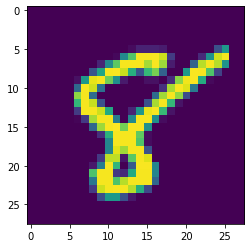

In [ ]:
plt.imshow(X[0].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(8)
